***Question 4***

Global Constants

In [1]:
#Defining Global Constants
import numpy as np
import time

seed = 20
step_size = 0.007
max_iter = 14000
tolerance = 0.00000000005

Reading the data and creating needed features

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('heart.csv')

data_unscaled = df.to_numpy()

#normalize the data into scale of [0,1]
data = data_unscaled / data_unscaled.max(axis=0)

#creating another feature with all 1 , 14th dimension for intercept or bias
ones_arr = np.ones(303).reshape(303,1)

#adding the 14th diemension
X = np.concatenate((data[:,:-1],ones_arr), axis = 1)
y = data[:,-1]

#changing label 0 to -1 to use the concise loss function 
y[y==0]=-1


All the update and loss methods.

*(a) A short, high-level description of your coordinate descent method.
In particular, you should give a concise description of how you solve problems (i) and (ii) above.
Do you need the function L(·) to be differentiable, or does it work with any loss function?*

*Answer =>*

(i) Which coordinate to choose? <br>
 => To choose a coordinate, I have chosen a cyclic approach where I would start with first coordinate and loop through all the coordinates. Once I come to an end, I would again start from 1st coordinate and loop through till the end coordinate. 
 <br>
 
(ii) How to set the new value of wi? <br>
=> With every coordinate we choose, the movement of W in d-dimensional space would be in negative direction of the gradient of L(w).
   The negative direction movement would be in form of steps where each step is fixed to value n = 0.007. And the update step which is coded is of below form
   
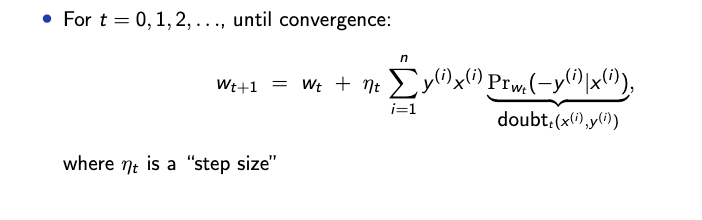

Here the doubt part is of below form:

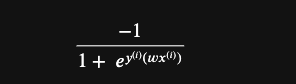

And the final equation for update step would be :
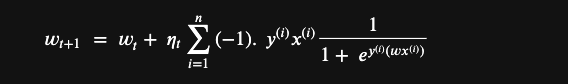

where x(i) is the feature data for that data point, y(i) is the label for that point and w are the weights at that step.

* Here we have L(.) as differentia, so we would need it to be that way. It would not work with any loss function.

In [ ]:
import random

#This method gives the doubt for x(i) and y(i) entry
def doubt_t(xi,yi,w):
    w_xi = np.dot(xi,w)
    return 1/(1+np.exp(yi*(w_xi)))

#This function gives the gradient for x(i) , y(i) with existing weights
def negative_gradient(x,y,w):
    learning = 0
    for i in range(len(x)):
        learning += y[i]*x[i]*doubt_t(x[i],y[i],w)
    return learning   

#This gives the whole learning rate by which we need to move in d-dim. space
def learning_rate(step_size,x,y,w):
    return step_size * negative_gradient(x,y,w)

#This gives the next point in d-dimesional space in opposite direction of the Gradient (update function)
def update_step(step_size,x,y,w):
    return (w + learning_rate(step_size,x,y,w))

#This gives the next point in d-dimesional space in opposite direction of the Gradient but in one coordinate 
def update_coordinate_step(step_size,x,y,w):
    #Lets get the overall gradient first
    temp_w = learning_rate(step_size,x,y,w)
    
    #print("temp_w",temp_w)
    
    #check which coordinate has max gradient
    chosen_coordinate = np.argmax(np.abs(temp_w))
    #print("max_gradient_idx",max_gradient_idx)

        
    updated_coordinate_w = np.zeros(len(w),dtype=float)
    #print("updated_coordinate_w",updated_coordinate_w)

    #print("temp_w[max_gradient_idx]",temp_w[max_gradient_idx])
        
    updated_coordinate_w[chosen_coordinate] = temp_w[chosen_coordinate]
    #updated_coordinate_w[max_gradient_idx] = -0.0003465
    #print("updated_coordinate_w",updated_coordinate_w)
    
    return (w + updated_coordinate_w)

#Cyclic coordinate descent by looping the coordinates in a cyclic way
def update_cyclic_coordinate_step(step_size,x,y,w,coordinate):
    #Lets get the overall gradient first
    temp_w = learning_rate(step_size,x,y,w)
    
    #print("temp_w",temp_w)
    
    #this is the cyclic coordinate we picked
    chosen_coordinate = coordinate
    #print("max_gradient_idx",max_gradient_idx)

        
    updated_coordinate_w = np.zeros(len(w),dtype=float)
    #print("updated_coordinate_w",updated_coordinate_w)

    #print("temp_w[max_gradient_idx]",temp_w[max_gradient_idx])
        
    updated_coordinate_w[chosen_coordinate] = temp_w[chosen_coordinate]
    #updated_coordinate_w[max_gradient_idx] = -0.0003465
    #print("updated_coordinate_w",updated_coordinate_w)
    
    return (w + updated_coordinate_w)


#This gives the next point in d-dimesional space in direction of random coordinate  
def update_random_feature_step(step_size,x,y,w):
    #Lets get the overall gradient first
    temp_w = learning_rate(step_size,x,y,w)
    

    #check which coordinate has max gradient
    # random integer from 0 to 13
    chosen_coordinate = random.randint(0, len(w)-1)

    #max_gradient_idx = np.argmax(np.abs(temp_w))
        
    updated_coordinate_w = np.zeros(len(w),dtype=float)
        
    updated_coordinate_w[chosen_coordinate] = temp_w[chosen_coordinate]
    
    return (w + updated_coordinate_w)

#This gives the loss function value for a data with its weights and bias
def get_loss(x,y,w):
    #print("w",w)
    loss = 0
    for i in range(len(x)):
        xi = x[i]
        yi = y[i]
        w_xi = np.dot(w,xi)
    
        #print(w_xi)
        loss += np.log(1 + np.exp(-yi* (w_xi)))
    return loss

*(b) Convergence.
Under what conditions do you think your method converges to the optimal loss? There’s no need
to prove anything: just give a few sentences of brief explanation.*

Answer => <br>
 The coordinate descent method is converging close to optimal loss when the loss change to the next step is minimal (equivalent to < tolerance = 0.00000000005) in my case.
 This is close to the loss I calculated from standard Logistic Regression , loss_loss.

For Validation, finding log_loss function using sklearn library !!

In [4]:
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(max_iter=9000, fit_intercept=False, penalty = 'none', solver='sag')
log_reg_model.fit(X, y)


#loss = log_loss(y_train, log_reg_model.predict_proba(X_train), eps=1e-15, normalize=False)
loss = log_loss(y, log_reg_model.predict_proba(X), eps=1e-15, normalize=False)

print("Train loss",loss)



Train loss 105.71799225971344


*• Begin by running a standard logistic regression solver (e.g., from scikit-learn) on the
training set. It should not be regularized: if the solver forces you to do this, just set the
regularization constant suitably to make it irrelevant. Make note of the final loss L∗.*

Calculate L* by using oefficients from Logistic regression and using loss function we coded

In [5]:
l_star = get_loss(X,y,log_reg_model.coef_[0])
print("L* = ",l_star)

L* =  105.7179922597134


*• Then, implement your coordinate descent method and run it on this data.*

This method runs the descent algorithm according to the follwoing descent types:
1. Gradient Descent
2. Coordinate Descent
3. Random feature coordinate Descent

Note:<br>
    • Finally, compare to a method that chooses coordinates i uniformly at random and then
updates wi using your method (we’ll call this “random-feature coordinate descent”). <br>

* Below run_descent method takes the descent type as one of the parameter and runs the random feature coordinate descent by picking random coordinate.

In [6]:
def run_descent(wt_start,feature_data,label_data,max_iter,descent_type):
    
    print("\n==================== RUNNING << {0} descent >> ====================".format(descent_type))
    
    #initializing all the values
    loss_lst = []
    t_lst = []
    prev_loss = 0
    t = 0 
    loss_change = 0
    prev_w_norm = 0 
  
    #note start time
    t_before = time.time()
    
    #Start iterating and move to next Wt for minimizing the Loss
    while(True):
        loss_t = get_loss(feature_data,label_data,wt_start)
        
        
        if(descent_type == 'gradient'):
            wt_start = update_step(step_size,feature_data,label_data,wt_start)
        elif(descent_type == 'random-feature'):
            wt_start = update_random_feature_step(step_size,feature_data,label_data,wt_start)
        elif(descent_type == 'cyclic-coordinate'):
            #assuming that we started from begining, let's cycle through each coordinate 
            picked_coordinate = t%len(wt_start)
            wt_start = update_cyclic_coordinate_step(step_size,feature_data,label_data,wt_start,picked_coordinate)
        else:
            wt_start = update_step(step_size,feature_data,label_data,wt_start)

        
            
        loss_lst.append(loss_t)
        t_lst.append(t)

        #check the change in the loss from last point
        loss_change = np.abs(prev_loss - loss_t)

        #Stopping critera with checking loss change with tolerance
        if(loss_change <= tolerance and t >= max_iter):
            print("Converging at loss {0} after [{1}] iterations since loss change is {2}".format(loss_t,t,loss_change))
            break
        prev_w_norm = np.linalg.norm(wt_start)  
        prev_loss = loss_t
        t += 1
        
    #Note end time    
    t_after = time.time()
    
    print("{0} descent ran for {1} seconds".format(descent_type,t_after-t_before))
    
    print("===================="*3)
    print("\n")
    return (t_lst,loss_lst)

In [7]:
#initial point w (weights) at origin as our starting point for descent
wt_start = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],dtype=float)

#Run Gradient Descent
gradient_desc_output = run_descent(wt_start,X,y,max_iter,'gradient')
#max_coordinate_desc_output = run_descent(wt_start,X,y,max_iter,'max-grad-coordinate')

#Run coordinate Descent
cyclic_coordinate_desc_output = run_descent(wt_start,X,y,max_iter,'cyclic-coordinate')

#Run Random feature coordinate descent
random_feature_coordinate_desc_output = run_descent(wt_start,X,y,max_iter,'random-feature')



==================== RUNNING << gradient descent >> ====================
Converging at loss 105.71798609552845 after [14000] iterations since loss change is 3.836930773104541e-13
gradient descent ran for 42.32496190071106 seconds



==================== RUNNING << cyclic-coordinate descent >> ====================
Converging at loss 105.85340257074408 after [17566] iterations since loss change is 4.148148491367465e-11
cyclic-coordinate descent ran for 58.27723526954651 seconds



==================== RUNNING << random-feature descent >> ====================
Converging at loss 105.99935611049837 after [14043] iterations since loss change is 3.466027465037769e-11
random-feature descent ran for 45.59422588348389 seconds




*• Produce a clearly-labeled graph that shows how the loss of your algorithm’s current iterate—
that is, L(wt)—decreases with t; it should asymptote to L∗. On the same graph, show the
corresponding curve for random-feature coordinate descent.*

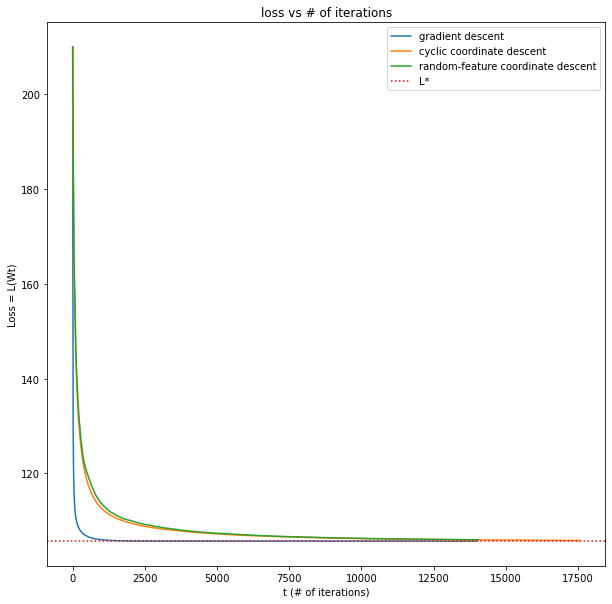

In [9]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10))


# plotting the loss for all the descent types
plt.plot(gradient_desc_output[0], gradient_desc_output[1], label = "gradient descent")
plt.plot(cyclic_coordinate_desc_output[0], cyclic_coordinate_desc_output[1], label = "cyclic coordinate descent")
plt.plot(random_feature_coordinate_desc_output[0], random_feature_coordinate_desc_output[1], label = "random-feature coordinate descent")

#plotting the L* from Logistic regression
plt.axhline(y=l_star, color='r', linestyle=':', label='L*')

# plotting the line 2 points 
plt.xlabel('t (# of iterations)')
# Set the y axis label of the current axis.
plt.ylabel('Loss = L(Wt)')
# Set a title of the current axes.
plt.title('loss vs # of iterations')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()